# Visualizing Dummy Data

**Dummy data**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X=np.array([9,8,7,6,5]).reshape(-1,1)
y=np.array([1,3,2,3,5])

- Linear Regression

In [4]:
linear_model=LinearRegression()
linear_model.fit(X,y)
y_pred=linear_model.predict(X)


**Polynomical Regression(degree 2)**

In [7]:
poly=PolynomialFeatures(degree=2)
X_poly=poly.fit_transform(X)
poly_model=LinearRegression()
poly_model.fit(X_poly,y)
y_poly_pred=poly_model.predict(X_poly)


**Plot**

In [73]:
plt.scatter(X_dummy,y_dummy,color='red',label='Actual')
plt.plot(X_dummy, y_pred,label='Linear Fit',color='blue')
plt.plot(X_dummy, y_poly_pred,label='Polynomial Fit(deg=2)',color='green')
plt.title("Linear vs Polynomial Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'X_dummy' is not defined

# Real Dataset:Salary Prediction

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

**Load dataset**

In [19]:
df=pd.read_csv("https://raw.githubusercontent.com/Naresh312143/mahalingpur-python-ml/refs/heads/main/Salary_Data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  6701 non-null   float64
 1   Salary               6699 non-null   float64
dtypes: float64(2)
memory usage: 104.9 KB


In [20]:
df.isnull().sum()

,0
Years of Experience,3
Salary,5


In [21]:
df.dropna(inplace=True)
df.isnull().sum()

,0
Years of Experience,0
Salary,0


- Train Test Split

In [22]:
X=df[["Years of Experience"]]
y=df["Salary"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Linear Regression

- Train Linear Regression

In [23]:
lin_model=LinearRegression()
lin_model.fit(X_train,y_train)
y_pred=lin_model.predict(X_test)

- Metrics

In [38]:
mse_lin=mean_squared_error(y_test,y_pred)
rmse_lin=np.sqrt(mse_lin)
r2_lin=r2_score(y_test,y_pred)

print("Linear Regression:")
print("MSE:",mse_lin)
print("RMSE:",rmse_lin)
print("R2 Score:",r2_lin)

Linear Regression:
MSE: 946833177.7094355
RMSE: 30770.654489455297
R2 Score: 0.6669549610495003


**Polynomial Regression(Degreess 2 and 4)**

**Degree2**

In [40]:
poly2=PolynomialFeatures(degree=2)
X_train_poly2=poly2.fit_transform(X_train)
X_test_poly2=poly2.transform(X_test)


poly2_model=LinearRegression()
poly2_model.fit(X_train_poly2,y_train)
y_pred_poly2=poly2_model.predict(X_test_poly2)

In [41]:
X_train_poly2

array([[  1.,   3.,   9.],
       [  1.,   6.,  36.],
       [  1.,  10., 100.],
       ...,
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   2.,   4.]])

In [42]:
X_test_poly2

array([[ 1.,  2.,  4.],
       [ 1.,  8., 64.],
       [ 1.,  3.,  9.],
       ...,
       [ 1.,  1.,  1.],
       [ 1.,  3.,  9.],
       [ 1.,  0.,  0.]])

- Metrics

In [43]:
mse_poly2=mean_squared_error(y_test,y_pred_poly2)
rmse_poly2=np.sqrt(mse_poly2)
r2_poly2=r2_score(y_test,y_pred_poly2)

**Degree 4**

In [44]:
poly4=PolynomialFeatures(degree=4)
X_train_poly4=poly4.fit_transform(X_train)
X_test_poly4=poly4.transform(X_test)

poly4_model=LinearRegression()
poly4_model.fit(X_train_poly4,y_train)
y_pred_poly4=poly4_model.predict(X_test_poly4)


In [45]:
X_train_poly4

array([[1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04],
       ...,
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01]])

In [46]:
X_test_poly4

array([[1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       ...,
       [1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]])

- Metrics

In [55]:
mse_poly4=mean_squared_error(y_test,y_pred_poly4)
rmse_poly4=np.sqrt(mse_poly4)
r2_poly4=r2_score(y_test,y_pred_poly4)

print("\n Polynomial Regression(Degree 2):")
print("MSE:",mse_poly2)
print("RMSE:",rmse_poly2)
print("R2 Score:",r2_poly2)

print("\n Polynomial Regression(Degree 4):")
print("MSE:",mse_poly4)
print("RMSE:",rmse_poly4)
print("R2 Score:",r2_poly4)




 Polynomial Regression(Degree 2):
MSE: 726857249.7211918
RMSE: 26960.290238074067
R2 Score: 0.7467308484568018

 Polynomial Regression(Degree 4):
MSE: 720033651.6859531
RMSE: 26833.44278481524
R2 Score: 0.7467308484568018


## Visualization of All Model

- Generate Smooth Line for prediction

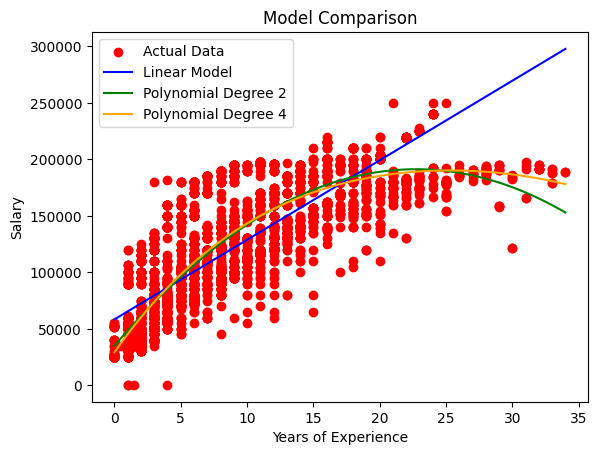

In [72]:
X_range=np.linspace(X.min(),X.max(),100).reshape(-1,1)

#create DataFrame with column name
X_range_df=pd.DataFrame(X_range,columns=["Years of Experience"])

#Transform using Polynomial Features
X_range_poly2=poly2.transform(X_range_df)
X_range_poly4=poly4.transform(X_range_df)

#Predict using Polynomial Models
y_range_line=lin_model.predict(X_range_df)
y_range_poly2=poly2_model.predict(X_range_poly2)
y_range_poly4=poly4_model.predict(X_range_poly4)

#Plot
plt.scatter(X,y,color="red",label="Actual Data")
plt.plot(X_range,y_range_line,label='Linear Model',color="blue")
plt.plot(X_range,y_range_poly2,label='Polynomial Degree 2',color="green")
plt.plot(X_range,y_range_poly4,label='Polynomial Degree 4',color="orange")
plt.title("Model Comparison")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()

- Model Performance Comparision

In [70]:
metrics_df=pd.DataFrame({
    "Model":["Linear","Polynomial Degree 2","Polynomial Degree 4"],
    "MSE":[mse_lin,mse_poly2,mse_poly4],
    "RMSE":[rmse_lin,rmse_poly2,rmse_poly4],
    "R2 Score":[r2_lin,r2_poly2,r2_poly4]

})

metrics_df.style.format({
    "MSE":"{:.2f}",
    "RMSE":"{:.2f}",
    "R2 Score":"{:.4f}"
})

,Model,MSE,RMSE,R2 Score
0,Linear,946833177.71,30770.65,0.6670
1,Polynomial Degree 2,726857249.72,26960.29,0.7467
2,Polynomial Degree 4,720033651.69,26833.44,0.7467
